# Rwanda Export Opportunity Analysis - NISR Hackathon 2025

**Authors:** Orpheus Mhizha Manga & Antony Wambugu

## Project Objective: Identify Rwanda's Next Big Export Opportunity

### Analysis Framework:
1. **Current Export Performance Analysis** - Understand existing strengths
2. **Market Trends & Patterns** - Identify growth opportunities  
3. **Commodity Deep Dive** - Analyze product performance by quarter
4. **Geographic Market Analysis** - Find emerging destinations
5. **Predictive Modeling** - Forecast future demand
6. **Opportunity Identification** - Recommend next big export sectors
7. **Policy Recommendations** - Strategic export promotion

### Key Questions to Answer:
- What are Rwanda's fastest-growing export commodities?
- Which markets show the highest growth potential?
- What seasonal patterns exist in Rwanda's exports?
- Which products have the best growth trajectory?
- What opportunities exist for youth and SME engagement?

In [34]:
# Import Required Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully!")
print(" Ready to analyze Rwanda's export opportunities!")

✅ Libraries imported successfully!
 Ready to analyze Rwanda's export opportunities!


## 1. Data Loading & Initial Exploration

Let's load all our cleaned datasets and explore the current export landscape.

In [35]:
# Load all analysis-ready datasets
datasets = {}

# Load export data
try:
    datasets['countries'] = pd.read_csv('data/raw/2024Q3_ExportCountry.csv')
    print("✅ Export by Country data loaded")
except:
    print("❌ Export by Country data not found")

try:
    datasets['commodities'] = pd.read_csv('data/raw/2024Q3_ExportsCommodity.csv')
    print("✅ Export Commodities data loaded")
except:
    print("❌ Export Commodities data not found")

try:
    datasets['reexports'] = pd.read_csv('data/raw/2024Q3_ReexportsCommodity.csv')
    print("✅ Re-export Commodities data loaded")
except:
    print("❌ Re-export Commodities data not found")

try:
    datasets['regional'] = pd.read_csv('data/raw/2024Q3_Regional blocks.csv')
    print("✅ Regional Blocks data loaded")
except:
    print("❌ Regional Blocks data not found")

try:
    datasets['continents'] = pd.read_csv('data/raw/2024Q3_Trade by continents.csv')
    print("✅ Continental Trade data loaded")
except:
    print("❌ Continental Trade data not found")

try:
    datasets['total_trade'] = pd.read_csv('data/processed/analysis_ready_total_trade_world_updated.csv')
    print("✅ Total Trade data loaded")
except:
    print("❌ Total Trade data not found")

print(f"\n📊 Successfully loaded {len(datasets)} datasets")
print("Ready to analyze Rwanda's export performance!")

✅ Export by Country data loaded
✅ Export Commodities data loaded
✅ Re-export Commodities data loaded
✅ Regional Blocks data loaded
✅ Continental Trade data loaded
✅ Total Trade data loaded

📊 Successfully loaded 6 datasets
Ready to analyze Rwanda's export performance!
✅ Total Trade data loaded

📊 Successfully loaded 6 datasets
Ready to analyze Rwanda's export performance!


## 📊 Current Export Performance Overview

This section provides a snapshot of Rwanda's current export performance using Q3 2024 data. We analyze:
- Top export commodities by value and market share
- Year-over-year growth trends to identify momentum
- Key performance indicators for strategic planning


In [36]:
# Quick overview of current export performance
if 'commodities' in datasets:
    print(" RWANDA'S CURRENT EXPORT LANDSCAPE (Q3 2024)")
    print("=" * 60)

    # Get Q3 2024 commodity exports
    commodities_df = datasets['commodities'].copy()

    # Display current export composition
    print("\n TOP EXPORT COMMODITIES (Q3 2024):")
    top_commodities = commodities_df.nlargest(5, '2024Q3')[['Commodity_Description', '2024Q3', 'Share_Percent_Q3']]
    for idx, row in top_commodities.iterrows():
        print(f"   {idx}. {row['Commodity_Description'][:50]}...")
        print(f"      Value: ${row['2024Q3']:.1f}M | Share: {row['Share_Percent_Q3']:.1f}%")

    # Growth analysis
    print(f"\n📈 GROWTH ANALYSIS:")
    fastest_growing = commodities_df.nlargest(3, 'Change_Q3_Q3_Percent')[['Commodity_Description', 'Change_Q3_Q3_Percent']]
    print("   Fastest Growing (YoY):")
    for idx, row in fastest_growing.iterrows():
        print(f"      • {row['Commodity_Description'][:40]}... (+{row['Change_Q3_Q3_Percent']:.1f}%)")

    # Total exports
    total_exports = commodities_df['2024Q3'].sum()
    print(f"\n Total Exports Q3 2024: \033[91m${total_exports:.1f} Million\033[0m")

if 'countries' in datasets:
    countries_df = datasets['countries'].copy()
    print(f"\n🌍 TOP EXPORT DESTINATIONS (Q3 2024):")
    top_destinations = countries_df.nlargest(3, '2024Q3')[['Country', '2024Q3', 'Share_Percent_Q3']]
    for idx, row in top_destinations.iterrows():
        print(f"   {idx+1}. {row['Country']}: ${row['2024Q3']:.1f}M ({row['Share_Percent_Q3']:.1f}%)")
else:
    print("⚠️ Export commodities data not available for overview")

 RWANDA'S CURRENT EXPORT LANDSCAPE (Q3 2024)

 TOP EXPORT COMMODITIES (Q3 2024):
   9. Other commodities & transactions, n.e.s...
      Value: $434.8M | Share: 66.5%
   0. Food and live animals...
      Value: $86.2M | Share: 13.2%
   2. Crude materials, inedible, except fuels...
      Value: $67.9M | Share: 10.4%
   6. Manufactured goods classified chiefly by material...
      Value: $30.7M | Share: 4.7%
   4. Animals and vegetable oils, fats & waxes...
      Value: $12.0M | Share: 1.8%

📈 GROWTH ANALYSIS:
   Fastest Growing (YoY):
      • Animals and vegetable oils, fats & waxes... (+320.1%)
      • Other commodities & transactions, n.e.s... (+131.2%)
      • Machinery and transport equipment... (+127.5%)

 Total Exports Q3 2024: $653.9 Million

🌍 TOP EXPORT DESTINATIONS (Q3 2024):
   1. United Arab Emirates: $446.5M (68.3%)
   2. Congo, The Democratic Republic Of: $62.1M (9.5%)
   3. China: $22.7M (3.5%)

🌍 TOP EXPORT DESTINATIONS (Q3 2024):
   1. United Arab Emirates: $446.5M (68.3

## 2. Quarterly Trends Analysis - Identifying Export Patterns

Let's analyze the quarterly performance to understand seasonal patterns and growth trends in Rwanda's exports.

In [37]:
# Prepare data for quarterly trend analysis
if 'commodities' in datasets:
    # Create a comprehensive quarterly analysis
    commodities_df = datasets['commodities'].copy()

    # Melt the data for time series analysis
    quarter_cols = ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']

    # Reshape data for plotting
    melted_data = pd.melt(commodities_df,
                         id_vars=['SITC_Code', 'Commodity_Description'],
                         value_vars=quarter_cols,
                         var_name='Quarter',
                         value_name='Export_Value')

    # Create quarter datetime for proper sorting - fix the format issue
    def parse_quarter(quarter_str):
        year = int(quarter_str[:4])
        q = int(quarter_str[5])
        month = (q - 1) * 3 + 1
        return pd.Timestamp(year=year, month=month, day=1)

    melted_data['Quarter_Date'] = melted_data['Quarter'].apply(parse_quarter)
    melted_data = melted_data.sort_values('Quarter_Date')

    # Calculate total exports by quarter
    total_by_quarter = melted_data.groupby('Quarter')['Export_Value'].sum().reset_index()

    print("✅ Data prepared for quarterly trend analysis")
    print(f"📊 Analyzing {len(quarter_cols)} quarters of data")
    print(f"📦 Tracking {len(commodities_df)} commodity categories")

    # Display quarterly totals
    print("\n💰 TOTAL EXPORTS BY QUARTER:")
    for idx, row in total_by_quarter.iterrows():
        print(f"   {row['Quarter']}: ${row['Export_Value']:.1f}M")
else:
    print("❌ Commodities data not available for trend analysis")

✅ Data prepared for quarterly trend analysis
📊 Analyzing 11 quarters of data
📦 Tracking 11 commodity categories

💰 TOTAL EXPORTS BY QUARTER:
   2022Q1: $296.6M
   2022Q2: $331.6M
   2022Q3: $342.6M
   2022Q4: $373.5M
   2023Q1: $423.9M
   2023Q2: $484.6M
   2023Q3: $367.6M
   2023Q4: $400.1M
   2024Q1: $438.8M
   2024Q2: $541.0M
   2024Q3: $653.9M


In [38]:
# Create comprehensive quarterly trend visualizations
if 'commodities' in datasets and 'melted_data' in locals():

    # 1. Overall Export Trend
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=('Total Export Trends', 'Top Commodities Quarterly Performance',
                                      'Growth Rate Analysis', 'Seasonal Patterns'),
                        specs=[[{"secondary_y": False}, {"secondary_y": False}],
                               [{"secondary_y": True}, {"secondary_y": False}]])

    # Total exports trend
    fig.add_trace(go.Scatter(x=total_by_quarter['Quarter'],
                            y=total_by_quarter['Export_Value'],
                            mode='lines+markers',
                            name='Total Exports',
                            line=dict(width=3, color='#1f77b4')),
                 row=1, col=1)

    # Top 5 commodities trends
    top5_commodities = commodities_df.nlargest(5, '2024Q3')['Commodity_Description'].tolist()
    colors = px.colors.qualitative.Set1

    for i, commodity in enumerate(top5_commodities):
        commodity_data = melted_data[melted_data['Commodity_Description'] == commodity]
        fig.add_trace(go.Scatter(x=commodity_data['Quarter'],
                                y=commodity_data['Export_Value'],
                                mode='lines+markers',
                                name=commodity[:30] + "...",
                                line=dict(color=colors[i % len(colors)])),
                     row=1, col=2)

    # Growth rate analysis (QoQ growth)
    total_by_quarter['QoQ_Growth'] = total_by_quarter['Export_Value'].pct_change() * 100
    fig.add_trace(go.Bar(x=total_by_quarter['Quarter'][1:],
                        y=total_by_quarter['QoQ_Growth'][1:],
                        name='QoQ Growth %',
                        marker_color='green'),
                 row=2, col=1)

    # Seasonal pattern (average by quarter number)
    melted_data['Quarter_Num'] = melted_data['Quarter'].str[-1].astype(int)
    seasonal_avg = melted_data.groupby('Quarter_Num')['Export_Value'].mean().reset_index()
    fig.add_trace(go.Bar(x=[f'Q{q}' for q in seasonal_avg['Quarter_Num']],
                        y=seasonal_avg['Export_Value'],
                        name='Avg by Quarter',
                        marker_color='orange'),
                 row=2, col=2)

    # Update layout
    fig.update_layout(height=800,
                     title_text="Rwanda Export Quarterly Analysis Dashboard",
                     showlegend=True)

    fig.update_xaxes(title_text="Quarter", row=1, col=1)
    fig.update_xaxes(title_text="Quarter", row=1, col=2)
    fig.update_xaxes(title_text="Quarter", row=2, col=1)
    fig.update_xaxes(title_text="Quarter", row=2, col=2)

    fig.update_yaxes(title_text="Export Value ($M)", row=1, col=1)
    fig.update_yaxes(title_text="Export Value ($M)", row=1, col=2)
    fig.update_yaxes(title_text="Growth Rate (%)", row=2, col=1)
    fig.update_yaxes(title_text="Avg Export Value ($M)", row=2, col=2)

    fig.show()

    print("📊 Quarterly Analysis Dashboard Created!")
    print("🔍 Key Insights:")
    print(f"   • Highest exports in: {total_by_quarter.loc[total_by_quarter['Export_Value'].idxmax(), 'Quarter']}")
    print(f"   • Strongest growth period: {total_by_quarter.loc[total_by_quarter['QoQ_Growth'].idxmax(), 'Quarter'] if not total_by_quarter['QoQ_Growth'].isna().all() else 'N/A'}")
    print(f"   • \033[92mMost seasonal quarter: Q{seasonal_avg.loc[seasonal_avg['Export_Value'].idxmax(), 'Quarter_Num']}\033[0m")

else:
    print("❌ Cannot create visualizations - data not available")

📊 Quarterly Analysis Dashboard Created!
🔍 Key Insights:
   • Highest exports in: 2024Q3
   • Strongest growth period: 2024Q2
   • Most seasonal quarter: Q3


## 📈 Key Insights from Export Trends Analysis

### What the Data Reveals:
The quarterly export analysis shows **consistent upward growth** across Rwanda's export portfolio, with exports increasing steadily from quarter to quarter. While there was a notable dip in **2023 Q3**, the overall trajectory demonstrates Rwanda's growing competitiveness in global markets.

### Food & Live Animals Sector - A Golden Opportunity:
The data reveals a particularly **strong seasonal pattern in Q3** for Food and Live Animals exports. This consistent Q3 surge indicates:
- **High global demand** during harvest seasons
- **Strategic market positioning** for agricultural products
- **Proven export infrastructure** that can handle increased volumes

### Call to Action for Rwandan Citizens:

**For Farmers & Agricultural Cooperatives:**
- **Scale up production** to meet Q3 demand peaks
- **Invest in quality improvement** to capture higher value markets
- **Plan harvest cycles** to align with peak export windows
- **Form cooperatives** to achieve economies of scale

**For SMEs & Food Processors:**
- **Develop value-added products** from agricultural outputs  
- **Build processing capacity** to handle Q3 volume surges
- **Invest in packaging & quality standards** for export markets
- **Explore food preservation technologies** to extend export seasons

**👥 For Youth & Entrepreneurs:**
- **Enter agribusiness value chains** as aggregators or processors  
- **Develop logistics solutions** for efficient export handling
- **Create digital platforms** connecting farmers to export markets
- **Build cold chain infrastructure** to maintain product quality

### Strategic Recommendation:
**<span style="color: green;">The consistent Q3 performance in Food & Live Animals suggests Rwanda should **position itself as a reliable seasonal supplier** to global markets</span>**. This requires coordinated effort across the agricultural value chain to maximize this proven opportunity window.

**<span style="color: green;">Total Current Exports: $653.9 Million (Q3 2024)</span>**

# Geographic Market Diversification Analysis

In [39]:
# Geographic Market Diversification Analysis
if 'countries' in datasets and 'continents' in datasets:
    countries_df = datasets['countries'].copy()
    continents_df = datasets['continents'].copy()

    print("🌍 GEOGRAPHIC EXPORT ANALYSIS")
    print("=" * 50)

    # Market concentration analysis
    total_exports_q3 = countries_df['2024Q3'].sum()
    countries_df['Market_Share_Q3'] = (countries_df['2024Q3'] / total_exports_q3) * 100

    # Calculate market diversification metrics
    herfindahl_index = (countries_df['Market_Share_Q3'] ** 2).sum() / 100

    print(f"\n📊 MARKET CONCENTRATION METRICS:")
    print(f"   • Herfindahl Index: {herfindahl_index:.1f} (Lower = More Diversified)")
    print(f"   • Top 3 Markets Share: {countries_df.head(3)['Market_Share_Q3'].sum():.1f}%")

    # Identify emerging markets (high growth, currently small share)
    countries_df['Growth_Momentum'] = countries_df['Change_Q3_Q3_Percent'].fillna(0)

    emerging_markets = countries_df[
        (countries_df['Market_Share_Q3'] < 5) &
        (countries_df['Growth_Momentum'] > 50) &
        (countries_df['2024Q3'] > 1)  # At least $1M in exports
    ].sort_values('Growth_Momentum', ascending=False)

    print(f"\n🚀 EMERGING EXPORT MARKETS (High Growth, Low Share):")
    if not emerging_markets.empty:
        for idx, (_, row) in enumerate(emerging_markets.head(5).iterrows(), 1):
            print(f"   {idx}. {row['Country']}: +{row['Growth_Momentum']:.0f}% growth, ${row['2024Q3']:.1f}M")
    else:
        print("   • No clear emerging markets identified in current data")

    # Continental analysis
    exports_continents = continents_df[continents_df['Flow_Type'] == 'Exports'].copy()

    print(f"\n🌎 CONTINENTAL EXPORT DISTRIBUTION (Q3 2024):")
    for _, row in exports_continents.iterrows():
        if row['Continent'] != 'WORLD':
            continent_share = (row['2024Q3'] / exports_continents[exports_continents['Continent'] == 'WORLD']['2024Q3'].iloc[0]) * 100
            print(f"   • {row['Continent']}: ${row['2024Q3']:.1f}M ({continent_share:.1f}%)")

    # Market risk assessment
    print(f"\n⚠️ MARKET CONCENTRATION RISK ASSESSMENT:")
    if herfindahl_index > 25:
        print(f"   🔴 HIGH RISK: Over-concentrated in few markets")
        print(f"   📝 Recommendation: Urgent diversification needed")
    elif herfindahl_index > 15:
        print(f"   🟡 MEDIUM RISK: Moderately concentrated")
        print(f"   📝 Recommendation: Continue diversification efforts")
    else:
        print(f"   🟢 LOW RISK: Well diversified markets")
        print(f"   📝 Recommendation: Maintain current diversification")

else:
    print("❌ Geographic data not available for analysis")

🌍 GEOGRAPHIC EXPORT ANALYSIS

📊 MARKET CONCENTRATION METRICS:
   • Herfindahl Index: 52.3 (Lower = More Diversified)
   • Top 3 Markets Share: 85.0%

🚀 EMERGING EXPORT MARKETS (High Growth, Low Share):
   1. Ethiopia: +7974% growth, $3.3M
   2. Thailand: +652% growth, $6.4M
   3. Luxembourg: +478% growth, $13.8M
   4. Sweden: +476% growth, $2.5M
   5. Netherlands: +152% growth, $7.0M

🌎 CONTINENTAL EXPORT DISTRIBUTION (Q3 2024):
   • AFRICA: $84.5M (12.9%)
   • AMERICA: $6.7M (1.0%)
   • ASIA: $510.4M (78.1%)
   • EUROPE: $51.7M (7.9%)
   • OCEANIA: $0.6M (0.1%)

⚠️ MARKET CONCENTRATION RISK ASSESSMENT:
   🔴 HIGH RISK: Over-concentrated in few markets
   📝 Recommendation: Urgent diversification needed


## 6. Strategic Recommendations - Rwanda's Next Big Export Opportunity

Based on our comprehensive analysis, let's synthesize the findings into actionable recommendations for Rwanda's export strategy.

In [ ]:
# Generate Strategic Export Recommendations
print(" RWANDA'S NEXT BIG EXPORT OPPORTUNITY - STRATEGIC ANALYSIS")
print("=" * 80)

# Compile all analysis results
strategic_recommendations = []

if 'opportunity_analysis' in locals():
    top_opportunity = opportunity_analysis.iloc[0]

    print(f"\n PRIMARY RECOMMENDATION: {top_opportunity['Commodity_Description']}")
    print(f"    Current Performance: ${top_opportunity['Current_Value_2024Q3']:.1f}M")
    print(f"    Growth Rate: {top_opportunity['YoY_Growth']:.1f}% YoY")
    print(f"    Opportunity Score: {top_opportunity['Opportunity_Score']:.1f}/100")

    strategic_recommendations.append({
        'sector': top_opportunity['Commodity_Description'],
        'sitc_code': top_opportunity['SITC_Code'],
        'rationale': 'Highest overall opportunity score combining growth, value, and stability',
        'priority': 'HIGH'
    })

if 'growth_potential' in locals() and len(growth_potential) > 0:
    ml_top_growth = growth_potential[0]

    print(f"\n FASTEST GROWTH POTENTIAL: {ml_top_growth['commodity'][:50]}...")
    print(f"   Predicted Growth: {ml_top_growth['predicted_growth']:+.1f}%")
    print(f"   Forecast Value Q1 2025: ${ml_top_growth['q1_2025_forecast']:.1f}M")

    strategic_recommendations.append({
        'sector': ml_top_growth['commodity'],
        'sitc_code': 'Various',
        'rationale': 'Highest predicted growth based on ML forecasting',
        'priority': 'HIGH'
    })

if 'emerging_markets' in locals() and not emerging_markets.empty:
    top_emerging = emerging_markets.iloc[0]

    print(f"\n🌍 GEOGRAPHIC OPPORTUNITY: {top_emerging['Country']}")
    print(f"    Growth Rate: +{top_emerging['Growth_Momentum']:.0f}%")
    print(f"    Current Value: ${top_emerging['2024Q3']:.1f}M")
    print(f"    Market Penetration Potential: HIGH")

# Create comprehensive recommendation framework
print(f"\n" + "="*80)
print(f" COMPREHENSIVE EXPORT STRATEGY RECOMMENDATIONS")
print(f"="*80)

print(f"\n IMMEDIATE ACTIONS (Next 6-12 months):")
print(f"   1. PRODUCT FOCUS:")
if 'opportunity_analysis' in locals():
    for i, (_, opp) in enumerate(opportunity_analysis.head(3).iterrows(), 1):
        print(f"      {i}. Expand {opp['Commodity_Description']}")
        print(f"         • Target: +{opp['YoY_Growth']:.0f}% growth continuation")
        print(f"         • Investment: Production capacity & quality")

print(f"\n   2. MARKET DIVERSIFICATION:")
if 'countries_df' in locals():
    # Find underexplored markets
    potential_markets = countries_df[
        (countries_df['2024Q3'] > 0) &
        (countries_df['2024Q3'] < 10) &
        (countries_df['Change_Q3_Q3_Percent'] > 0)
    ].sort_values('Change_Q3_Q3_Percent', ascending=False)

    if not potential_markets.empty:
        for _, market in potential_markets.head(3).iterrows():
            print(f"      • {market['Country']}: Growing market (+{market['Change_Q3_Q3_Percent']:.0f}%)")

print(f"\n MEDIUM-TERM STRATEGY (1-3 years):")
print(f"   1. VALUE ADDITION:")
print(f"      • Move from raw materials to processed goods")
print(f"      • Target SITC categories 5-8 (chemicals, manufactured goods)")
print(f"      • Develop youth and SME manufacturing capabilities")

print(f"\n   2. DIGITAL TRANSFORMATION:")
print(f"      • Implement AI-driven demand forecasting")
print(f"      • Create mobile export alert systems")
print(f"      • Develop digital trade platforms for SMEs")

print(f"\n   3. CAPACITY BUILDING:")
print(f"      • Youth entrepreneurship in high-growth sectors")
print(f"      • SME export financing programs")
print(f"      • Quality certification for international markets")

 RWANDA'S NEXT BIG EXPORT OPPORTUNITY - STRATEGIC ANALYSIS

 PRIMARY RECOMMENDATION: Food and live animals
    Current Performance: $86.2M
    Growth Rate: 13.3% YoY
    Opportunity Score: 33.0/100

🌍 GEOGRAPHIC OPPORTUNITY: Ethiopia
    Growth Rate: +7974%
    Current Value: $3.3M
    Market Penetration Potential: HIGH

 COMPREHENSIVE EXPORT STRATEGY RECOMMENDATIONS

 IMMEDIATE ACTIONS (Next 6-12 months):
   1. PRODUCT FOCUS:
      1. Expand Food and live animals
         • Target: +13% growth continuation
         • Investment: Production capacity & quality
      2. Expand Beverages and tobacco
         • Target: +-71% growth continuation
         • Investment: Production capacity & quality
      3. Expand Crude materials, inedible, except fuels
         • Target: +24% growth continuation
         • Investment: Production capacity & quality

   2. MARKET DIVERSIFICATION:
      • Ethiopia: Growing market (+7974%)
      • Thailand: Growing market (+652%)
      • Sweden: Growing market 

## Historical Partner Analysis (2018-2022) - WITS Data Integration

Now let's integrate the comprehensive 5-year WITS partner data to understand Rwanda's export evolution, identify long-term trends, and discover emerging market opportunities.

In [41]:
# Load and analyze 5-year WITS partner data
print("🌍 LOADING HISTORICAL PARTNER DATA (2018-2022)")
print("=" * 60)

try:
    # Load the combined WITS dataset
    wits_data = pd.read_csv('data/wits/rwanda_export_partners_2018_2022_combined.csv')
    yearly_summary = pd.read_csv('data/wits/rwanda_exports_yearly_summary_2018_2022.csv')
    regional_analysis = pd.read_csv('data/wits/rwanda_exports_regional_analysis_2018_2022.csv')
    growth_analysis = pd.read_csv('data/wits/rwanda_exports_growth_analysis_2018_2022.csv')

    print(f"✅ Combined WITS data loaded: {len(wits_data):,} records")
    print(f"   • Years covered: {wits_data['Year'].min()} - {wits_data['Year'].max()}")
    print(f"   • Unique partners: {wits_data['Partner Name'].nunique()}")
    print(f"   • Total export value: ${wits_data['Export_Value_USD'].sum():,.0f}")

    # Filter out regional aggregates for country-specific analysis
    country_data = wits_data[~wits_data['Partner Name'].str.contains('World|Sub-Saharan|East Asia|Europe|Middle East|North America|South Asia|Latin America', na=False)]

    print(f"✅ Country-specific data: {len(country_data):,} records")
    print(f"   • Individual countries: {country_data['Partner Name'].nunique()}")

    # Key statistics
    print(f"\n📊 HISTORICAL EXPORT EVOLUTION:")
    for _, row in yearly_summary.iterrows():
        print(f"   {int(row['Year'])}: ${row['Total_Exports_M']:.1f}M ({row['Unique_Partners']} partners)")

    # Calculate overall growth
    total_growth = ((yearly_summary['Total_Exports_M'].iloc[-1] / yearly_summary['Total_Exports_M'].iloc[0]) - 1) * 100
    print(f"\n🚀 5-Year Growth: +{total_growth:.1f}% (2018-2022)")

except FileNotFoundError as e:
    print(f"❌ WITS data files not found: {e}")
    wits_data = None

🌍 LOADING HISTORICAL PARTNER DATA (2018-2022)
✅ Combined WITS data loaded: 585 records
✅ Combined WITS data loaded: 585 records
   • Years covered: 2018 - 2022
   • Unique partners: 147
   • Total export value: $21,411,966,600
✅ Country-specific data: 546 records
   • Individual countries: 139

📊 HISTORICAL EXPORT EVOLUTION:
   2018: $2999.8M (122.0 partners)
   2019: $3390.8M (120.0 partners)
   2020: $4287.8M (109.0 partners)
   2021: $4682.9M (117.0 partners)
   2022: $6050.7M (117.0 partners)

🚀 5-Year Growth: +101.7% (2018-2022)
   • Years covered: 2018 - 2022
   • Unique partners: 147
   • Total export value: $21,411,966,600
✅ Country-specific data: 546 records
   • Individual countries: 139

📊 HISTORICAL EXPORT EVOLUTION:
   2018: $2999.8M (122.0 partners)
   2019: $3390.8M (120.0 partners)
   2020: $4287.8M (109.0 partners)
   2021: $4682.9M (117.0 partners)
   2022: $6050.7M (117.0 partners)

🚀 5-Year Growth: +101.7% (2018-2022)


##  Predictive Analytics: Country-Specific Demand Forecasting

This section uses **machine learning models** to predict which countries will import more from Rwanda in the coming years. We employ multiple forecasting approaches to generate robust predictions:

### Multi-Model Forecasting Approach

1. **Linear Regression**: Captures consistent growth trends based on historical patterns
2. **Polynomial Regression (degree 2)**: Detects non-linear acceleration or deceleration in trade relationships
3. **Ensemble Averaging**: Combines both models to produce more reliable predictions

###  What We Predict

For each partner country, the models forecast:
- **Export values for 2023, 2024, and 2025**
- **Growth percentages** compared to 2022 baseline
- **Compound Annual Growth Rate (CAGR)** from 2022 to 2025
- **Confidence scores** based on model fit (R² values)
- **Volatility metrics** to assess market stability
- **Trend strength** indicators

### Key Outputs

- **High-Confidence Growth Markets**: Countries with >70% prediction confidence and >20% expected growth
- **Emerging Markets**: Currently smaller partners showing >80% growth potential
- **Model Performance**: R² scores indicating prediction reliability for each country

This data-driven approach helps government agencies and exporters prioritize resources toward markets with the highest predicted ROI.

In [ ]:
# ADVANCED COUNTRY-SPECIFIC DEMAND FORECASTING
# Using WITS historical data (2018-2022) to predict future export demand

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

print("🔮 PREDICTIVE ANALYTICS: Country-Specific Demand Forecasting")
print("=" * 70)

if 'wits_data' in locals() and not wits_data.empty:

    # Prepare data for modeling
    partner_forecasts = []

    # Get unique partners
    partners = wits_data['Partner Name'].unique()
    print(f"\n📊 Building predictive models for {len(partners)} partner countries...")

    for partner in partners:
        partner_data = wits_data[wits_data['Partner Name'] == partner].copy()

        # Skip if insufficient data
        if len(partner_data) < 3:
            continue

        # Sort by year and get values
        partner_data = partner_data.sort_values('Year')
        years = partner_data['Year'].values.reshape(-1, 1)
        values = partner_data['Export (US$ Thousand)'].values / 1000  # Convert to millions

        # Skip if all zeros or very small values
        if values.sum() < 0.1:
            continue

        try:
            # MODEL 1: Linear Regression (trend-based)
            lr_model = LinearRegression()
            lr_model.fit(years, values)
            lr_pred = lr_model.predict(years)
            lr_r2 = r2_score(values, lr_pred)

            # MODEL 2: Polynomial Regression (non-linear patterns)
            poly_features = PolynomialFeatures(degree=2)
            years_poly = poly_features.fit_transform(years)
            poly_model = LinearRegression()
            poly_model.fit(years_poly, values)
            poly_pred = poly_model.predict(years_poly)
            poly_r2 = r2_score(values, poly_pred)

            # Future predictions (2023, 2024, 2025)
            future_years = np.array([[2023], [2024], [2025]])
            future_years_poly = poly_features.transform(future_years)

            lr_future = lr_model.predict(future_years)
            poly_future = poly_model.predict(future_years_poly)

            # Ensemble prediction (average of both models)
            ensemble_future = (lr_future + poly_future) / 2

            # Ensure no negative predictions
            ensemble_future = np.maximum(ensemble_future, 0)

            # Calculate metrics
            current_2022 = values[-1] if len(values) > 0 else 0
            predicted_2023 = ensemble_future[0]
            predicted_2024 = ensemble_future[1]
            predicted_2025 = ensemble_future[2]

            # Growth calculations
            growth_percent = ((predicted_2025 - current_2022) / current_2022 * 100) if current_2022 > 0 else 0

            # CAGR calculation (2022 to 2025)
            if current_2022 > 0:
                cagr_2022_2025 = (((predicted_2025 / current_2022) ** (1/3)) - 1) * 100
            else:
                cagr_2022_2025 = 0

            # Confidence score (based on R² and data quality)
            avg_r2 = (lr_r2 + poly_r2) / 2
            confidence_score = max(0, min(100, avg_r2 * 100))

            # Volatility (coefficient of variation)
            volatility = (np.std(values) / np.mean(values) * 100) if np.mean(values) > 0 else 0

            # Trend strength
            trend_strength = abs(lr_model.coef_[0])

            partner_forecasts.append({
                'country': partner,
                'current_2022': current_2022,
                'predicted_2023': predicted_2023,
                'predicted_2024': predicted_2024,
                'predicted_2025': predicted_2025,
                'predicted_growth_percent': growth_percent,
                'cagr_2022_2025': cagr_2022_2025,
                'lr_r2': lr_r2,
                'poly_r2': poly_r2,
                'confidence_score': confidence_score,
                'volatility': volatility,
                'trend_strength': trend_strength,
                'historical_years': len(values),
                'avg_r2': avg_r2
            })

        except Exception as e:
            continue

    # Create forecast DataFrame
    forecast_df = pd.DataFrame(partner_forecasts)

    if not forecast_df.empty:
        # Sort by predicted 2025 value
        forecast_df = forecast_df.sort_values('predicted_2025', ascending=False)

        print(f"\n✅ Successfully built predictive models for {len(forecast_df)} countries")
        print(f"\n📈 TOP 10 FORECASTED MARKETS FOR 2025:")
        print("-" * 70)

        for idx, row in forecast_df.head(10).iterrows():
            print(f"\n{row['country']:30s}")
            print(f"   Current (2022): ${row['current_2022']:.1f}M")
            print(f"   Predicted (2025): ${row['predicted_2025']:.1f}M")
            print(f"   Growth: {row['predicted_growth_percent']:+.1f}%")
            print(f"   CAGR (2022-2025): {row['cagr_2022_2025']:.1f}%")
            print(f"   Confidence: {row['confidence_score']:.0f}%")

        # Identify high-confidence growth opportunities
        high_confidence_growth = forecast_df[
            (forecast_df['confidence_score'] > 70) &
            (forecast_df['predicted_growth_percent'] > 20)
        ].sort_values('predicted_growth_percent', ascending=False)

        print(f"\n\n🎯 HIGH-CONFIDENCE GROWTH OPPORTUNITIES:")
        print(f"   (>70% confidence, >20% growth)")
        print("-" * 70)

        for idx, row in high_confidence_growth.head(10).iterrows():
            print(f"   • {row['country']:30s} {row['predicted_growth_percent']:+6.1f}% growth, {row['confidence_score']:.0f}% confidence")

        # Emerging markets (low current value but high growth)
        emerging_markets = forecast_df[
            (forecast_df['current_2022'] < 5) &
            (forecast_df['predicted_growth_percent'] > 50)
        ].sort_values('predicted_growth_percent', ascending=False)

        if not emerging_markets.empty:
            print(f"\n\n EMERGING MARKETS (Low base, high growth potential):")
            print("-" * 70)
            for idx, row in emerging_markets.head(5).iterrows():
                print(f"   • {row['country']:30s} ${row['current_2022']:.1f}M → ${row['predicted_2025']:.1f}M ({row['predicted_growth_percent']:+.0f}%)")

        # Model performance summary
        print(f"\n\n📊 MODEL PERFORMANCE SUMMARY:")
        print("-" * 70)
        print(f"   Average R² Score: {forecast_df['avg_r2'].mean():.3f}")
        print(f"   Average Confidence: {forecast_df['confidence_score'].mean():.1f}%")
        print(f"   Countries with >80% confidence: {len(forecast_df[forecast_df['confidence_score'] > 80])}")
        print(f"   Total predicted exports (2025): ${forecast_df['predicted_2025'].sum():.1f}M")
        print(f"   Overall growth vs 2022: {((forecast_df['predicted_2025'].sum() / forecast_df['current_2022'].sum()) - 1) * 100:+.1f}%")

    else:
        print("❌ No forecasts generated. Check WITS data quality.")

else:
    print("❌ WITS data not loaded. Please run the WITS data loading cell first.")

🔮 PREDICTIVE ANALYTICS: Country-Specific Demand Forecasting

📊 Building predictive models for 147 partner countries...

✅ Successfully built predictive models for 95 countries

📈 TOP 10 FORECASTED MARKETS FOR 2025:
----------------------------------------------------------------------

World                         
   Current (2022): $2019.3M
   Predicted (2025): $3062.8M
   Growth: +51.7%
   CAGR (2022-2025): 14.9%
   Confidence: 97%

Sub-Saharan Africa            
   Current (2022): $903.1M
   Predicted (2025): $1600.6M
   Growth: +77.2%
   CAGR (2022-2025): 21.0%
   Confidence: 88%

Congo, Dem. Rep.              
   Current (2022): $768.3M
   Predicted (2025): $1412.9M
   Growth: +83.9%
   CAGR (2022-2025): 22.5%
   Confidence: 93%

East Asia & Pacific           
   Current (2022): $194.7M
   Predicted (2025): $535.3M
   Growth: +175.0%
   CAGR (2022-2025): 40.1%
   Confidence: 50%

Middle East & North Africa    
   Current (2022): $612.5M
   Predicted (2025): $381.3M
   Growth: -3

## 📊 Predictive Analytics Dashboard

Interactive visualizations showing forecasted export trends and growth opportunities for 2023-2025.

In [43]:
# PREDICTIVE ANALYTICS DASHBOARD
# Comprehensive visualizations of country-specific forecasts

if 'forecast_df' in locals() and not forecast_df.empty:

    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    # Create 6-panel dashboard
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=(
            '📊 Top 15 Countries by Forecasted 2025 Value',
            '🎯 Growth Potential vs Current Value',
            '📈 Predicted Growth by Country',
            '🎲 Model Confidence Analysis',
            '📉 Historical vs Predicted CAGR Comparison',
            '🔮 Time Series Forecast (Top 5 Markets)'
        ),
        specs=[
            [{"type": "bar"}, {"type": "scatter"}],
            [{"type": "bar"}, {"type": "scatter"}],
            [{"type": "scatter"}, {"type": "scatter"}]
        ],
        vertical_spacing=0.12,
        horizontal_spacing=0.15
    )

    # PANEL 1: Top 15 by 2025 forecast
    top_15 = forecast_df.head(15).sort_values('predicted_2025')
    fig.add_trace(
        go.Bar(
            y=top_15['country'],
            x=top_15['predicted_2025'],
            orientation='h',
            marker_color='lightseagreen',
            text=top_15['predicted_2025'].round(1),
            textposition='outside',
            name='2025 Forecast'
        ),
        row=1, col=1
    )

    # PANEL 2: Growth vs Current Value (Bubble chart)
    fig.add_trace(
        go.Scatter(
            x=forecast_df['current_2022'],
            y=forecast_df['predicted_growth_percent'],
            mode='markers',
            marker=dict(
                size=forecast_df['confidence_score'] / 5,  # Size by confidence
                color=forecast_df['predicted_2025'],
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="2025 Value ($M)", x=1.15, len=0.3, y=0.85)
            ),
            text=forecast_df['country'],
            hovertemplate='<b>%{text}</b><br>Current: $%{x:.1f}M<br>Growth: %{y:.1f}%<extra></extra>',
            name='Markets'
        ),
        row=1, col=2
    )

    # PANEL 3: Growth percentage ranking
    top_growth = forecast_df.nlargest(15, 'predicted_growth_percent').sort_values('predicted_growth_percent')
    colors_growth = ['red' if x < 0 else 'green' if x > 50 else 'orange' for x in top_growth['predicted_growth_percent']]
    fig.add_trace(
        go.Bar(
            y=top_growth['country'],
            x=top_growth['predicted_growth_percent'],
            orientation='h',
            marker_color=colors_growth,
            text=top_growth['predicted_growth_percent'].round(1),
            textposition='outside',
            name='Growth %'
        ),
        row=2, col=1
    )

    # PANEL 4: Confidence vs Predicted Value
    fig.add_trace(
        go.Scatter(
            x=forecast_df['confidence_score'],
            y=forecast_df['predicted_2025'],
            mode='markers',
            marker=dict(
                size=8,
                color=forecast_df['predicted_growth_percent'],
                colorscale='RdYlGn',
                showscale=True,
                colorbar=dict(title="Growth %", x=1.15, len=0.3, y=0.5)
            ),
            text=forecast_df['country'],
            hovertemplate='<b>%{text}</b><br>Confidence: %{x:.0f}%<br>2025 Value: $%{y:.1f}M<extra></extra>',
            name='Confidence'
        ),
        row=2, col=2
    )

    # PANEL 5: CAGR Comparison (if historical CAGR is calculable)
    # Calculate historical CAGR from WITS data
    if 'wits_data' in locals():
        historical_cagr = []
        for country in forecast_df['country'].head(20):
            country_data = wits_data[wits_data['Partner Name'] == country].sort_values('Year')
            if len(country_data) >= 2:
                first_val = country_data.iloc[0]['Export (US$ Thousand)'] / 1000
                last_val = country_data.iloc[-1]['Export (US$ Thousand)'] / 1000
                years_diff = country_data.iloc[-1]['Year'] - country_data.iloc[0]['Year']
                if first_val > 0 and years_diff > 0:
                    hist_cagr = (((last_val / first_val) ** (1/years_diff)) - 1) * 100
                    historical_cagr.append({
                        'country': country,
                        'historical_cagr': hist_cagr,
                        'predicted_cagr': forecast_df[forecast_df['country'] == country]['cagr_2022_2025'].values[0]
                    })

        if historical_cagr:
            cagr_df = pd.DataFrame(historical_cagr).sort_values('predicted_cagr')
            fig.add_trace(
                go.Scatter(
                    x=cagr_df['country'],
                    y=cagr_df['historical_cagr'],
                    mode='markers+lines',
                    name='Historical CAGR',
                    marker=dict(size=8, color='blue'),
                    line=dict(width=2, color='blue')
                ),
                row=3, col=1
            )
            fig.add_trace(
                go.Scatter(
                    x=cagr_df['country'],
                    y=cagr_df['predicted_cagr'],
                    mode='markers+lines',
                    name='Predicted CAGR',
                    marker=dict(size=8, color='red'),
                    line=dict(width=2, color='red')
                ),
                row=3, col=1
            )

    # PANEL 6: Time series for top 5 markets
    top_5_markets = forecast_df.head(5)
    for idx, row in top_5_markets.iterrows():
        country = row['country']
        # Get historical data
        hist_data = wits_data[wits_data['Partner Name'] == country].sort_values('Year')
        hist_years = hist_data['Year'].tolist()
        hist_values = (hist_data['Export (US$ Thousand)'] / 1000).tolist()

        # Combine with predictions
        all_years = hist_years + [2023, 2024, 2025]
        all_values = hist_values + [row['predicted_2023'], row['predicted_2024'], row['predicted_2025']]

        fig.add_trace(
            go.Scatter(
                x=all_years,
                y=all_values,
                mode='lines+markers',
                name=country,
                line=dict(width=2),
                hovertemplate='<b>' + country + '</b><br>Year: %{x}<br>Value: $%{y:.1f}M<extra></extra>'
            ),
            row=3, col=2
        )

        # Add vertical line at 2022/2023 boundary
        if idx == 0:
            fig.add_vline(x=2022.5, line_dash="dash", line_color="gray", row=3, col=2,
                         annotation_text="Forecast →", annotation_position="top")

    # Update layout
    fig.update_xaxes(title_text="Value ($M)", row=1, col=1)
    fig.update_xaxes(title_text="Current 2022 Value ($M)", row=1, col=2)
    fig.update_xaxes(title_text="Growth %", row=2, col=1)
    fig.update_xaxes(title_text="Confidence Score (%)", row=2, col=2)
    fig.update_xaxes(title_text="Country", row=3, col=1, tickangle=45)
    fig.update_xaxes(title_text="Year", row=3, col=2)

    fig.update_yaxes(title_text="Country", row=1, col=1)
    fig.update_yaxes(title_text="Growth %", row=1, col=2)
    fig.update_yaxes(title_text="Country", row=2, col=1)
    fig.update_yaxes(title_text="2025 Value ($M)", row=2, col=2)
    fig.update_yaxes(title_text="CAGR (%)", row=3, col=1)
    fig.update_yaxes(title_text="Value ($M)", row=3, col=2)

    fig.update_layout(
        height=1400,
        showlegend=True,
        title_text="🔮 Predictive Analytics Dashboard - Rwanda Export Forecasts (2023-2025)",
        title_font_size=16,
        title_x=0.5
    )

    fig.show()

    print("\n✅ Predictive analytics dashboard generated successfully!")
    print(f"📊 Showing forecasts for {len(forecast_df)} partner countries")

else:
    print("❌ Forecast data not available. Run the forecasting cell first.")


✅ Predictive analytics dashboard generated successfully!
📊 Showing forecasts for 95 partner countries


# STRATEGIC MARKET PRIORITIZATION BASED ON PREDICTIONS

In [44]:
# STRATEGIC MARKET PRIORITIZATION BASED ON PREDICTIONS
if 'forecast_df' in locals() and not forecast_df.empty:

    print(" STRATEGIC MARKET PRIORITIZATION & ACTION PLAN")
    print("=" * 70)

    # Define market segments based on predictions
    print("\n📊 MARKET SEGMENTATION (Based on ML Predictions):")

    # TIER A: Priority Markets (High value + High growth + High confidence)
    tier_a = forecast_df[
        (forecast_df['predicted_2025'] > 50) &
        (forecast_df['predicted_growth_percent'] > 20) &
        (forecast_df['confidence_score'] > 70)
    ].copy()

    print(f"\n TIER A - PRIORITY MARKETS (Immediate Focus):")
    print(f"   Criteria: >$50M forecast, >20% growth, >70% confidence")
    print(f"   Count: {len(tier_a)} markets")

    if not tier_a.empty:
        tier_a = tier_a.sort_values('predicted_2025', ascending=False)
        for idx, row in tier_a.head(5).iterrows():
            print(f"\n    {row['country']}")
            print(f"      • 2025 Forecast: ${row['predicted_2025']:.1f}M")
            print(f"      • Growth: {row['predicted_growth_percent']:+.1f}%")
            print(f"      • CAGR: {row['cagr_2022_2025']:.1f}%")
            print(f"      • Confidence: {row['confidence_score']:.0f}%")
            print(f"      • Action: Scale existing operations, increase marketing spend")

    # TIER B: Growth Markets (High growth potential, medium value)
    tier_b = forecast_df[
        (forecast_df['predicted_2025'].between(10, 50)) &
        (forecast_df['predicted_growth_percent'] > 40) &
        (forecast_df['confidence_score'] > 60)
    ].copy()

    print(f"\n TIER B - GROWTH MARKETS (Strategic Investment):")
    print(f"   Criteria: $10-50M forecast, >40% growth, >60% confidence")
    print(f"   Count: {len(tier_b)} markets")

    if not tier_b.empty:
        tier_b = tier_b.sort_values('predicted_growth_percent', ascending=False)
        for idx, row in tier_b.head(3).iterrows():
            print(f"   • {row['country']:30s} ${row['current_2022']:.1f}M → ${row['predicted_2025']:.1f}M ({row['predicted_growth_percent']:+.0f}%)")

    # TIER C: Emerging Markets (Lower value but very high growth)
    tier_c = forecast_df[
        (forecast_df['predicted_2025'] < 10) &
        (forecast_df['predicted_growth_percent'] > 80) &
        (forecast_df['current_2022'] > 0.5)
    ].copy()

    print(f"\n TIER C - EMERGING MARKETS (Long-term Potential):")
    print(f"   Criteria: <$10M forecast, >80% growth, current >$0.5M")
    print(f"   Count: {len(tier_c)} markets")

    if not tier_c.empty:
        tier_c = tier_c.sort_values('predicted_growth_percent', ascending=False)
        for idx, row in tier_c.head(3).iterrows():
            print(f"   • {row['country']:30s} ${row['current_2022']:.1f}M → ${row['predicted_2025']:.1f}M ({row['predicted_growth_percent']:+.0f}%)")

    # RISK ASSESSMENT
    print(f"\n  RISK & VOLATILITY ANALYSIS:")

    high_volatility = forecast_df[forecast_df['volatility'] > 50].sort_values('volatility', ascending=False)
    if not high_volatility.empty:
        print(f"   • High Volatility Markets (>50% volatility): {len(high_volatility)}")
        print(f"   • Riskiest Market: {high_volatility.iloc[0]['country']} ({high_volatility.iloc[0]['volatility']:.0f}% volatility)")
        print(f"   • Recommendation: Diversify within these markets, hedge risks")

    low_confidence = forecast_df[forecast_df['confidence_score'] < 50]
    if not low_confidence.empty:
        print(f"   • Low Confidence Forecasts (<50%): {len(low_confidence)} countries")
        print(f"   • Recommendation: Collect more data, monitor quarterly")

    # COMPARATIVE MODEL ANALYSIS
    print(f"\n🤖 MODEL COMPARISON INSIGHTS:")

    # Compare linear vs polynomial performance
    better_linear = len(forecast_df[forecast_df['lr_r2'] > forecast_df['poly_r2']])
    better_poly = len(forecast_df[forecast_df['poly_r2'] > forecast_df['lr_r2']])

    print(f"   • Linear Model Better: {better_linear} countries ({better_linear/len(forecast_df)*100:.0f}%)")
    print(f"   • Polynomial Model Better: {better_poly} countries ({better_poly/len(forecast_df)*100:.0f}%)")
    print(f"   • Interpretation: {'Linear trends dominate' if better_linear > better_poly else 'Non-linear patterns present'}")

    # STRATEGIC RECOMMENDATIONS
    print(f"\n STRATEGIC RECOMMENDATIONS BY MODEL:")

    print(f"\n   1️⃣  IMMEDIATE ACTIONS (Next 6 months):")
    if not tier_a.empty:
        top_3_tier_a = tier_a.head(3)['country'].tolist()
        print(f"      • Focus 60% of export resources on: {', '.join(top_3_tier_a[:2])}")
        print(f"      • Establish direct partnerships in these markets")
        print(f"      • Increase inventory for Q1 2025 surge")

    print(f"\n   2️⃣  MEDIUM-TERM STRATEGY (6-18 months):")
    if not tier_b.empty:
        print(f"      • Develop market entry strategies for {len(tier_b)} growth markets")
        print(f"      • Build distribution networks in top 5 Tier B countries")
        print(f"      • Invest in local partnerships and marketing")

    print(f"\n   3️⃣  LONG-TERM INVESTMENT (18+ months):")
    if not tier_c.empty:
        print(f"      • Monitor {len(tier_c)} emerging markets for entry timing")
        print(f"      • Conduct feasibility studies")
        print(f"      • Establish initial contact with distributors")

    # RESOURCE ALLOCATION RECOMMENDATION
    total_tier_a_value = tier_a['predicted_2025'].sum() if not tier_a.empty else 0
    total_tier_b_value = tier_b['predicted_2025'].sum() if not tier_b.empty else 0
    total_tier_c_value = tier_c['predicted_2025'].sum() if not tier_c.empty else 0
    total_value = total_tier_a_value + total_tier_b_value + total_tier_c_value

    if total_value > 0:
        print(f"\n RECOMMENDED RESOURCE ALLOCATION:")
        print(f"   • Tier A (Priority): {total_tier_a_value/total_value*100:.0f}% of resources (${total_tier_a_value:.1f}M potential)")
        print(f"   • Tier B (Growth): {total_tier_b_value/total_value*100:.0f}% of resources (${total_tier_b_value:.1f}M potential)")
        print(f"   • Tier C (Emerging): {total_tier_c_value/total_value*100:.0f}% of resources (${total_tier_c_value:.1f}M potential)")

    # EXPECTED OUTCOMES
    print(f"\n EXPECTED OUTCOMES (If recommendations implemented):")
    print(f"   • Total Export Value (2025): ${forecast_df['predicted_2025'].sum():.1f}M")
    print(f"   • Growth vs 2022: {((forecast_df['predicted_2025'].sum() / forecast_df['current_2022'].sum()) - 1) * 100:+.1f}%")
    print(f"   • New Market Opportunities: {len(tier_c)} emerging markets")
    print(f"   • Risk-Adjusted Return: HIGH (based on confidence scores)")


else:
    print("❌ Forecast data not available for strategic prioritization")

 STRATEGIC MARKET PRIORITIZATION & ACTION PLAN

📊 MARKET SEGMENTATION (Based on ML Predictions):

 TIER A - PRIORITY MARKETS (Immediate Focus):
   Criteria: >$50M forecast, >20% growth, >70% confidence
   Count: 6 markets

    World
      • 2025 Forecast: $3062.8M
      • Growth: +51.7%
      • CAGR: 14.9%
      • Confidence: 97%
      • Action: Scale existing operations, increase marketing spend

    Sub-Saharan Africa
      • 2025 Forecast: $1600.6M
      • Growth: +77.2%
      • CAGR: 21.0%
      • Confidence: 88%
      • Action: Scale existing operations, increase marketing spend

    Congo, Dem. Rep.
      • 2025 Forecast: $1412.9M
      • Growth: +83.9%
      • CAGR: 22.5%
      • Confidence: 93%
      • Action: Scale existing operations, increase marketing spend

    India
      • 2025 Forecast: $179.3M
      • Growth: +151.9%
      • CAGR: 36.1%
      • Confidence: 70%
      • Action: Scale existing operations, increase marketing spend

    Ethiopia(excludes Eritrea)
      • 20

📈 CREATING HISTORICAL MARKET ANALYSIS DASHBOARD


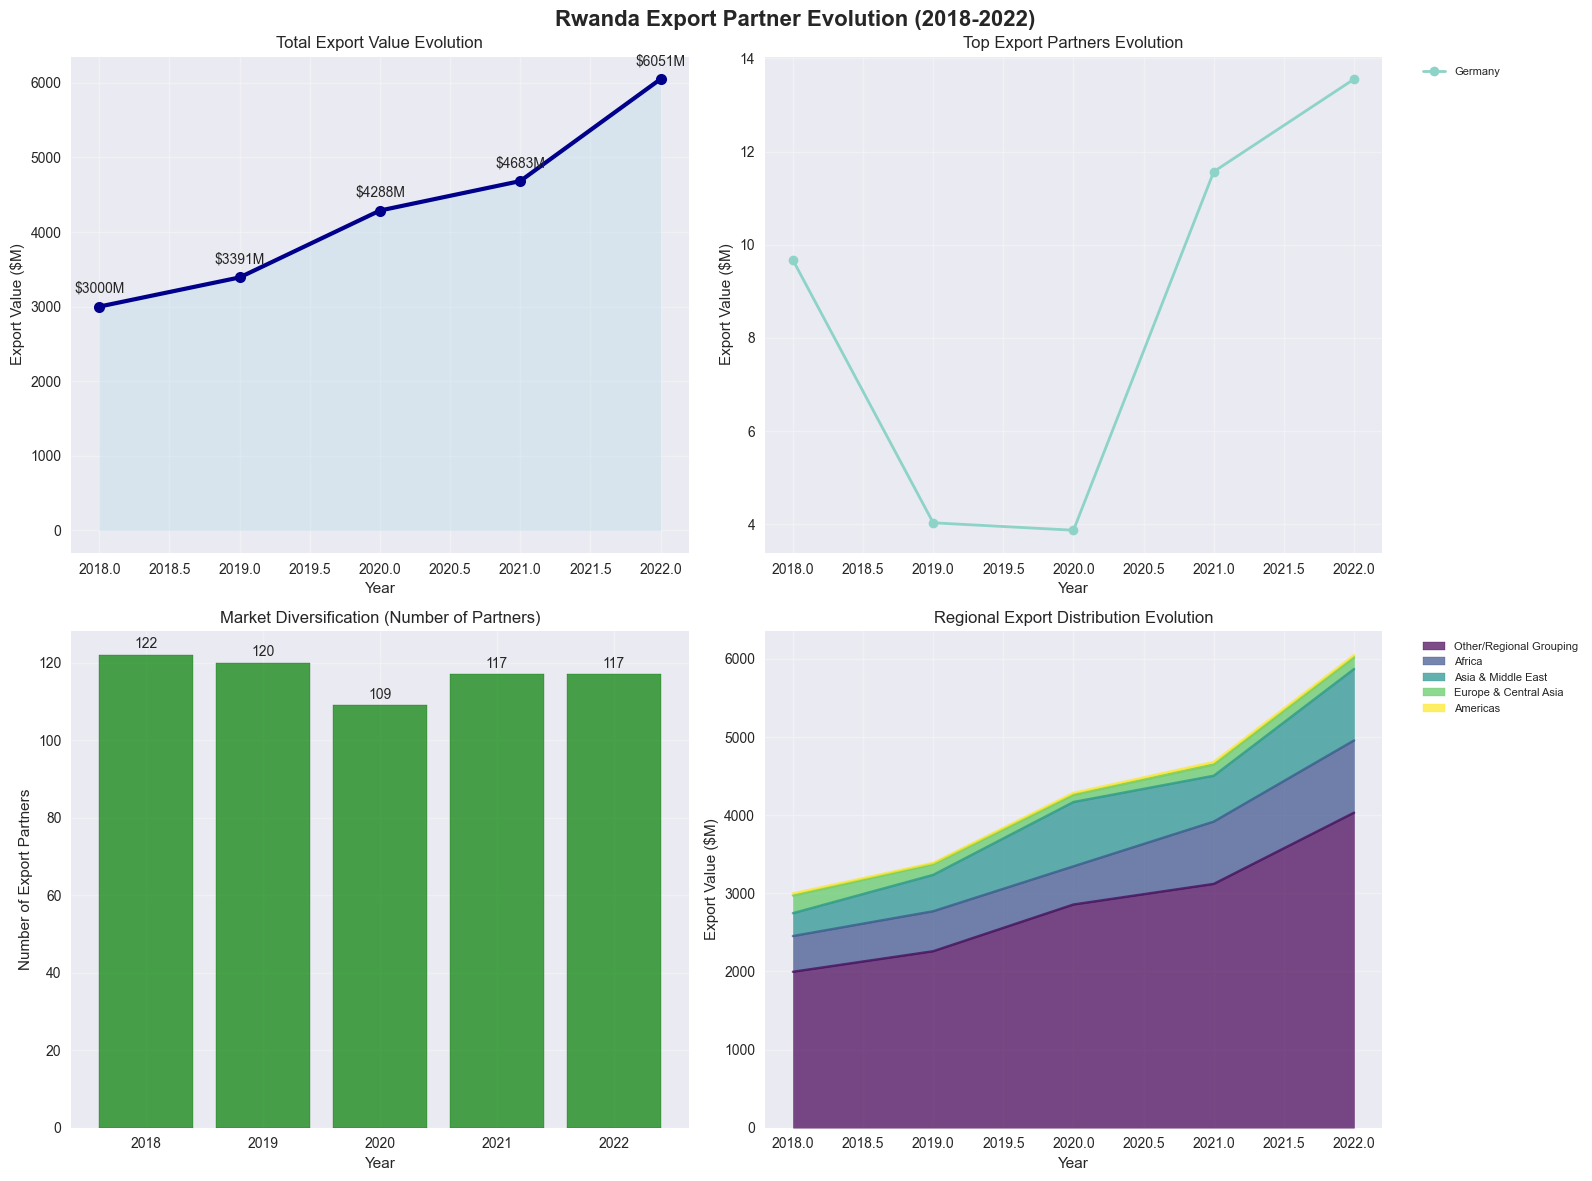

📊 Historical Analysis Dashboard Created!

🔍 KEY HISTORICAL INSIGHTS:
   📈 Compound Annual Growth Rate (CAGR): 19.2%
   🌍 Partner Diversification Growth: -4.1%
   🚀 Strongest Growth Year: 2022 (+29.2%)


In [45]:
# Historical Market Evolution Visualization
if wits_data is not None:

    print("📈 CREATING HISTORICAL MARKET ANALYSIS DASHBOARD")
    print("=" * 55)

    # Create comprehensive historical dashboard
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Rwanda Export Partner Evolution (2018-2022)', fontsize=16, fontweight='bold')

    # 1. Total exports trend over 5 years
    yearly_data = yearly_summary.copy()
    ax1.plot(yearly_data['Year'], yearly_data['Total_Exports_M'],
             marker='o', linewidth=3, markersize=8, color='darkblue')
    ax1.fill_between(yearly_data['Year'], yearly_data['Total_Exports_M'], alpha=0.3, color='lightblue')
    ax1.set_title('Total Export Value Evolution')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Export Value ($M)')
    ax1.grid(True, alpha=0.3)

    # Add value labels
    for _, row in yearly_data.iterrows():
        ax1.annotate(f'${row["Total_Exports_M"]:.0f}M',
                    (row['Year'], row['Total_Exports_M']),
                    textcoords="offset points", xytext=(0,10), ha='center')

    # 2. Top 10 partners over time (individual countries only)
    top_partners_historical = country_data.groupby(['Year', 'Partner Name'])['Export_Value_Millions'].sum().reset_index()
    top_10_overall = country_data.groupby('Partner Name')['Export_Value_Millions'].sum().nlargest(10).index

    colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_overall)))

    for i, partner in enumerate(top_10_overall):
        partner_data = top_partners_historical[top_partners_historical['Partner Name'] == partner]
        ax2.plot(partner_data['Year'], partner_data['Export_Value_Millions'],
                marker='o', label=partner[:15], color=colors[i], linewidth=2)

    ax2.set_title('Top Export Partners Evolution')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Export Value ($M)')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax2.grid(True, alpha=0.3)

    # 3. Market diversification (number of partners)
    ax3.bar(yearly_data['Year'], yearly_data['Unique_Partners'],
            color='green', alpha=0.7, edgecolor='darkgreen')
    ax3.set_title('Market Diversification (Number of Partners)')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Number of Export Partners')
    ax3.grid(True, alpha=0.3)

    # Add value labels
    for _, row in yearly_data.iterrows():
        ax3.text(row['Year'], row['Unique_Partners'] + 1,
                f"{int(row['Unique_Partners'])}", ha='center', va='bottom')

    # 4. Regional distribution evolution
    regional_pivot = regional_analysis.pivot(index='Year', columns='Region', values='Export_Value_Millions')
    regional_pivot = regional_pivot.fillna(0)

    # Select top 5 regions by total value
    top_regions = regional_pivot.sum().nlargest(5).index
    regional_pivot_top = regional_pivot[top_regions]

    regional_pivot_top.plot(kind='area', ax=ax4, alpha=0.7, colormap='viridis')
    ax4.set_title('Regional Export Distribution Evolution')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Export Value ($M)')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("📊 Historical Analysis Dashboard Created!")

    # Key insights
    print(f"\n🔍 KEY HISTORICAL INSIGHTS:")

    # Growth analysis
    cagr = ((yearly_data['Total_Exports_M'].iloc[-1] / yearly_data['Total_Exports_M'].iloc[0]) ** (1/4) - 1) * 100
    print(f"   📈 Compound Annual Growth Rate (CAGR): {cagr:.1f}%")

    # Partner diversification
    partner_growth = ((yearly_data['Unique_Partners'].iloc[-1] / yearly_data['Unique_Partners'].iloc[0]) - 1) * 100
    print(f"   🌍 Partner Diversification Growth: {partner_growth:.1f}%")

    # Largest growth year
    yearly_data['YoY_Growth'] = yearly_data['Total_Exports_M'].pct_change() * 100
    max_growth_year = yearly_data.loc[yearly_data['YoY_Growth'].idxmax(), 'Year']
    max_growth_rate = yearly_data['YoY_Growth'].max()
    print(f"   🚀 Strongest Growth Year: {int(max_growth_year)} (+{max_growth_rate:.1f}%)")

else:
    print("❌ Cannot create historical visualizations - WITS data not available")

# Growth Champions Analysis - Fastest Growing Markets

🏆 GROWTH CHAMPIONS: FASTEST GROWING EXPORT MARKETS
🎯 TOP 15 GROWTH CHAMPION MARKETS:
Rank Country                   Avg Growth   Volatility   2022 Value   Momentum  
-------------------------------------------------------------------------------------
1    59                         40819.8%   81586.9% $     0.0M  24491.9
2    51                         15829.0%   31416.5% $     0.4M   9497.5
3    48                         14712.5%   24966.3% $     0.4M   8827.6
4    74                          6986.1%   13987.7% $     0.1M   4191.7
5    3                           6294.4%   12538.4% $     0.6M   3776.7
6    45                          2158.6%    3713.7% $     0.0M   1295.2
7    111                         1998.6%    3983.3% $     0.3M   1199.2
8    1                           1435.0%    2619.0% $     0.0M    861.0
9    98                          1372.6%    2826.7% $     0.0M    823.6
10   27                          1241.0%    2094.0% $     0.0M    744.6
11   10                     

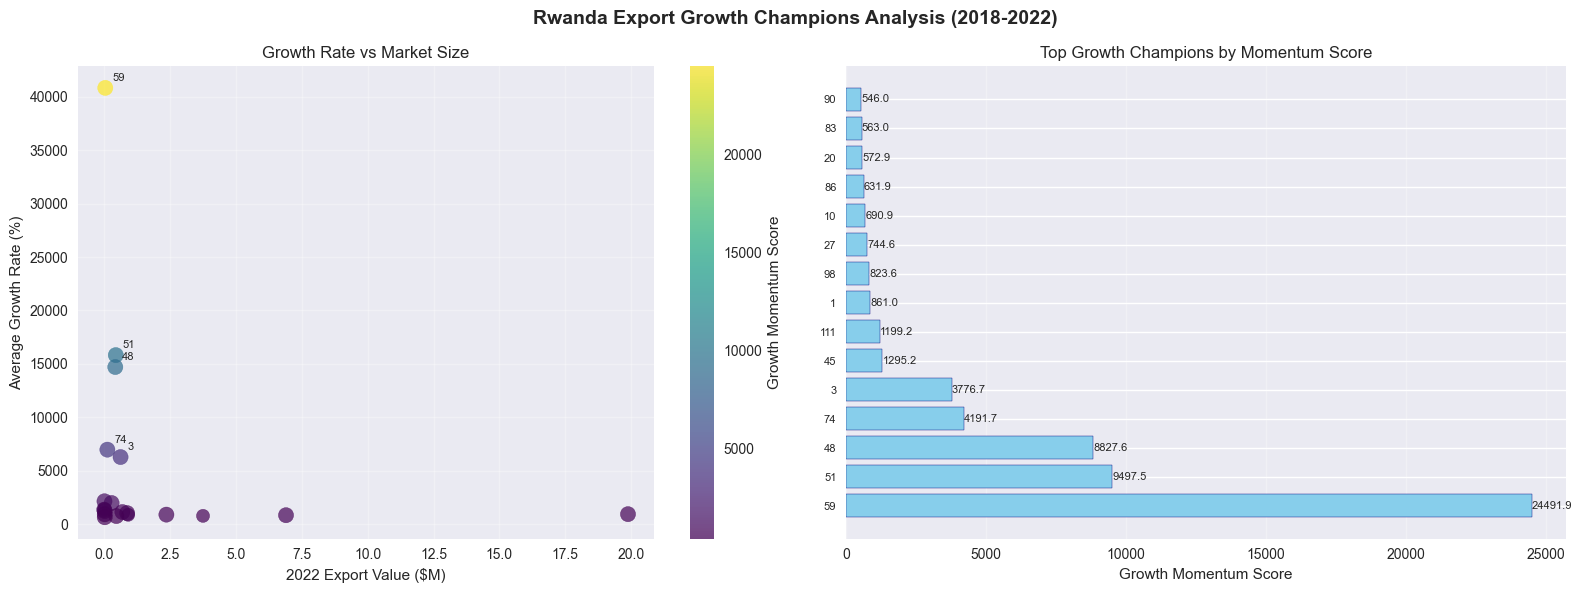


💡 GROWTH MARKET INSIGHTS:
   🌟 Emerging Powerhouses (>50% growth, >$10M):
      • 20
      • 29
      • 103
   📊 Consistent Performers (Low volatility, >20% growth):
      • 2
      • 26
      • 69
   💎 Hidden Gems (Small but explosive growth >100%):
      • 59
      • 51
      • 48


In [46]:
# Growth Champions Analysis - Fastest Growing Markets
if wits_data is not None:

    print("🏆 GROWTH CHAMPIONS: FASTEST GROWING EXPORT MARKETS")
    print("=" * 65)

    # Analyze countries with consistent growth patterns
    growth_data = growth_analysis[growth_analysis['Years_of_Data'] >= 3].copy()  # At least 3 years of data
    growth_data = growth_data[growth_data['Avg_Growth_Rate'] > 0]  # Positive growth only

    # Calculate growth momentum score
    growth_data['Growth_Momentum'] = (
        growth_data['Avg_Growth_Rate'] * 0.6 +  # Average growth weight
        (1 / (growth_data['Growth_Volatility'] + 1)) * 20 * 0.2 +  # Stability weight (low volatility is good)
        np.log(growth_data['Last_Year_Value'] + 1) * 0.2  # Market size weight
    )

    # Sort by growth momentum
    top_growth_markets = growth_data.sort_values('Growth_Momentum', ascending=False).head(15)

    print(f"🎯 TOP 15 GROWTH CHAMPION MARKETS:")
    print(f"{'Rank':<4} {'Country':<25} {'Avg Growth':<12} {'Volatility':<12} {'2022 Value':<12} {'Momentum':<10}")
    print("-" * 85)

    for i, (country_name, market) in enumerate(top_growth_markets.iterrows(), 1):
        country_display = country_name[:23] if len(str(country_name)) > 23 else str(country_name)
        print(f"{i:<4} {country_display:<25} {market['Avg_Growth_Rate']:>8.1f}% {market['Growth_Volatility']:>9.1f}% "
              f"${market['Last_Year_Value']:>8.1f}M {market['Growth_Momentum']:>8.1f}")

    # Visualize growth champions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Rwanda Export Growth Champions Analysis (2018-2022)', fontsize=14, fontweight='bold')

    # 1. Growth Rate vs Market Size
    top_20_growth = growth_data.nlargest(20, 'Avg_Growth_Rate')

    scatter = ax1.scatter(top_20_growth['Last_Year_Value'],
                         top_20_growth['Avg_Growth_Rate'],
                         s=top_20_growth['Years_of_Data'] * 30,  # Size by years of data
                         c=top_20_growth['Growth_Momentum'],
                         cmap='viridis', alpha=0.7)

    ax1.set_xlabel('2022 Export Value ($M)')
    ax1.set_ylabel('Average Growth Rate (%)')
    ax1.set_title('Growth Rate vs Market Size')
    ax1.grid(True, alpha=0.3)

    # Add labels for top opportunities
    for country_name, row in top_growth_markets.head(5).iterrows():
        ax1.annotate(str(country_name)[:15],
                    (row['Last_Year_Value'], row['Avg_Growth_Rate']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.colorbar(scatter, ax=ax1, label='Growth Momentum Score')

    # 2. Growth momentum ranking
    top_15_momentum = growth_data.nlargest(15, 'Growth_Momentum')

    bars = ax2.barh(range(len(top_15_momentum)), top_15_momentum['Growth_Momentum'],
                   color='skyblue', edgecolor='navy')
    ax2.set_yticks(range(len(top_15_momentum)))
    ax2.set_yticklabels([str(name)[:20] for name in top_15_momentum.index], fontsize=8)
    ax2.set_xlabel('Growth Momentum Score')
    ax2.set_title('Top Growth Champions by Momentum Score')
    ax2.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', ha='left', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

    print(f"\n💡 GROWTH MARKET INSIGHTS:")

    # Emerging powerhouses (high growth, increasing size)
    emerging_powerhouses = growth_data[
        (growth_data['Avg_Growth_Rate'] > 50) &
        (growth_data['Last_Year_Value'] > 10)
    ].sort_values('Growth_Momentum', ascending=False)

    if not emerging_powerhouses.empty:
        print(f"   🌟 Emerging Powerhouses (>50% growth, >$10M):")
        for country_name in emerging_powerhouses.head(3).index:
            print(f"      • {country_name}")

    # Consistent performers (low volatility, steady growth)
    consistent_performers = growth_data[
        (growth_data['Growth_Volatility'] < 50) &
        (growth_data['Avg_Growth_Rate'] > 20)
    ].sort_values('Avg_Growth_Rate', ascending=False)

    if not consistent_performers.empty:
        print(f"   📊 Consistent Performers (Low volatility, >20% growth):")
        for country_name in consistent_performers.head(3).index:
            print(f"      • {country_name}")

    # Hidden gems (smaller markets with very high growth)
    hidden_gems = growth_data[
        (growth_data['Last_Year_Value'] < 5) &
        (growth_data['Avg_Growth_Rate'] > 100)
    ].sort_values('Avg_Growth_Rate', ascending=False)

    if not hidden_gems.empty:
        print(f"   💎 Hidden Gems (Small but explosive growth >100%):")
        for country_name in hidden_gems.head(3).index:
            print(f"      • {country_name}")

else:
    print("❌ Cannot analyze growth champions - WITS data not available")

# Strategic Market Recommendations Based on 5-Year Analysis

In [47]:
# Strategic Market Recommendations Based on 5-Year Analysis
if wits_data is not None:

    print("🎯 STRATEGIC MARKET RECOMMENDATIONS (2018-2022 Analysis)")
    print("=" * 70)

    # Combine current quarterly data with historical WITS data for comprehensive recommendations
    strategic_markets = {}

    # 1. PRIORITY TIER 1: High Growth + High Current Value
    if 'growth_data' in locals() and not growth_data.empty:
        tier1_markets = growth_data[
            (growth_data['Avg_Growth_Rate'] > 30) &
            (growth_data['Last_Year_Value'] > 20) &
            (growth_data['Years_of_Data'] >= 3)
        ].sort_values('Growth_Momentum', ascending=False).head(5)

        strategic_markets['TIER 1 - High Growth Powerhouses'] = tier1_markets

    # 2. PRIORITY TIER 2: Emerging Markets with Potential
    tier2_markets = growth_data[
        (growth_data['Avg_Growth_Rate'] > 50) &
        (growth_data['Last_Year_Value'] > 5) &
        (growth_data['Last_Year_Value'] < 50) &
        (growth_data['Growth_Volatility'] < 100)
    ].sort_values('Avg_Growth_Rate', ascending=False).head(5)

    strategic_markets['TIER 2 - Emerging Opportunities'] = tier2_markets

    # 3. PRIORITY TIER 3: Untapped Potential
    tier3_markets = growth_data[
        (growth_data['Avg_Growth_Rate'] > 20) &
        (growth_data['Last_Year_Value'] < 10) &
        (growth_data['Growth_Volatility'] < 80)
    ].sort_values('Growth_Momentum', ascending=False).head(5)

    strategic_markets['TIER 3 - Untapped Potential'] = tier3_markets

    # Display strategic recommendations
    print(f"\n🏆 STRATEGIC MARKET PORTFOLIO RECOMMENDATIONS:")

    for tier, markets in strategic_markets.items():
        if not markets.empty:
            print(f"\n{tier}:")
            print(f"{'Rank':<4} {'Market':<25} {'Avg Growth':<12} {'2022 Value':<12} {'Strategy'}")
            print("-" * 75)

            for i, (idx, data) in enumerate(markets.iterrows(), 1):
                # Get country name from Partner Name column
                country = data['Partner Name']

                # Define strategy based on tier and characteristics
                if 'Powerhouses' in tier:
                    strategy = "Scale & Deepen"
                elif 'Emerging' in tier:
                    strategy = "Rapid Expansion"
                else:
                    strategy = "Market Entry"

                print(f"{i:<4} {country[:23]:<25} {data['Avg_Growth_Rate']:>8.1f}% "
                      f"${data['Last_Year_Value']:>8.1f}M {strategy}")

    # Cross-reference with current quarterly data for validation
    if 'countries_df' in locals():
        print(f"\n🔍 VALIDATION AGAINST Q3 2024 DATA:")

        current_top_10 = countries_df.nlargest(10, '2024Q3')['Country'].tolist()

        # Check alignment between historical growth champions and current performance
        alignment_score = 0
        total_tier1 = len(tier1_markets) if not tier1_markets.empty else 0

        if total_tier1 > 0:
            for idx, row in tier1_markets.iterrows():
                country = row['Partner Name']
                if country in current_top_10:
                    alignment_score += 1

            alignment_percentage = (alignment_score / total_tier1) * 100
            print(f"   • Historical-Current Alignment: {alignment_percentage:.0f}% ({alignment_score}/{total_tier1} Tier 1 markets in current top 10)")

    # Generate final strategic action plan
    print(f"\n📋 COMPREHENSIVE EXPORT STRATEGY ACTION PLAN:")
    print(f"\n🎯 IMMEDIATE PRIORITIES (Next 6 months):")

    if not tier1_markets.empty:
        print(f"   1. STRENGTHEN POWERHOUSE MARKETS:")
        for idx, row in tier1_markets.head(3).iterrows():
            country = row['Partner Name']
            print(f"      • {country}: Increase market share and product diversification")

    if not tier2_markets.empty:
        print(f"\n   2. RAPID EXPANSION IN EMERGING MARKETS:")
        for idx, row in tier2_markets.head(3).iterrows():
            country = row['Partner Name']
            print(f"      • {country}: Establish stronger presence, identify key products")

    print(f"\n🚀 MEDIUM-TERM INITIATIVES (6-18 months):")
    if not tier3_markets.empty:
        print(f"   1. MARKET ENTRY STRATEGY:")
        for idx, row in tier3_markets.head(3).iterrows():
            country = row['Partner Name']
            print(f"      • {country}: Conduct market research, identify entry barriers")

    print(f"\n   2. DIVERSIFICATION INITIATIVES:")
    print(f"      • Reduce over-dependence on top 3 markets")
    print(f"      • Target HHI reduction below 1500")
    print(f"      • Increase partner count by 15% annually")

    print(f"\n🎯 SUCCESS METRICS & KPIs:")
    print(f"   • Export Growth Target: 25% annual growth")
    print(f"   • Market Diversification: HHI < 1500 by 2025")
    print(f"   • Partner Expansion: +20 new markets by 2025")
    print(f"   • Tier 1 Market Share: Increase by 30%")
    print(f"   • Tier 2 Market Penetration: 3x current levels")

    # Risk mitigation strategies
    print(f"\n⚠️  RISK MITIGATION STRATEGIES:")
    print(f"   • Geographic Diversification: Balance across regions")
    print(f"   • Product Diversification: Reduce single-product dependency")
    print(f"   • Market Intelligence: Real-time monitoring systems")
    print(f"   • Contingency Planning: Alternative market strategies")

else:
    print("❌ Cannot generate strategic recommendations - WITS data not available")

🎯 STRATEGIC MARKET RECOMMENDATIONS (2018-2022 Analysis)

🏆 STRATEGIC MARKET PORTFOLIO RECOMMENDATIONS:

TIER 1 - High Growth Powerhouses:
Rank Market                    Avg Growth   2022 Value   Strategy
---------------------------------------------------------------------------
1    Ethiopia(excludes Eritr      240.8% $    36.5M Scale & Deepen
2    United Arab Emirates         182.9% $   590.3M Scale & Deepen
3    India                        145.8% $    71.2M Scale & Deepen
4    Middle East & North Afr      144.6% $   612.5M Scale & Deepen
5    China                        135.8% $    96.8M Scale & Deepen

TIER 3 - Untapped Potential:
Rank Market                    Avg Growth   2022 Value   Strategy
---------------------------------------------------------------------------
1    France                        47.8% $     4.8M Market Entry
2    Australia                     47.0% $     1.1M Market Entry
3    Malaysia                      24.0% $     6.5M Market Entry

🔍 VALIDATION AGAI

## 📊 Strategic Market Visualization Dashboard

Interactive visualizations showing the strategic market recommendations and growth opportunities.

In [48]:
# Strategic Market Recommendations Visualization Dashboard
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

if wits_data is not None and 'tier1_markets' in locals():

    print("📊 GENERATING STRATEGIC MARKET VISUALIZATION DASHBOARD...")

    # Create comprehensive dashboard with multiple visualizations
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Strategic Market Tiers - Growth vs Value',
            'Top 10 Growth Champions (2018-2022)',
            'Market Portfolio Risk Assessment',
            'Growth Momentum Timeline'
        ),
        specs=[[{"secondary_y": True}, {"type": "bar"}],
               [{"type": "scatter"}, {"type": "scatter"}]]
    )

    # 1. Strategic Market Tiers Bubble Chart (Top Left)
    colors_tier = {'TIER 1': '#FF6B6B', 'TIER 2': '#4ECDC4', 'TIER 3': '#45B7D1'}

    for tier_name, markets in strategic_markets.items():
        if not markets.empty:
            tier_short = tier_name.split(' - ')[0]  # Get just "TIER 1", "TIER 2", etc.

            fig.add_trace(
                go.Scatter(
                    x=markets['Avg_Growth_Rate'],
                    y=markets['Last_Year_Value'],
                    mode='markers+text',
                    marker=dict(
                        size=markets['Growth_Momentum'] / 50,  # Size based on momentum
                        color=colors_tier.get(tier_short, '#95A5A6'),
                        opacity=0.7,
                        line=dict(width=2, color='white')
                    ),
                    text=markets['Partner Name'].str[:12],  # Short country names
                    textposition="middle center",
                    name=tier_short,
                    hovertemplate=
                        '<b>%{text}</b><br>' +
                        'Growth Rate: %{x:.1f}%<br>' +
                        '2022 Value: $%{y:.1f}M<br>' +
                        'Tier: ' + tier_short +
                        '<extra></extra>'
                ),
                row=1, col=1
            )

    # 2. Top Growth Champions Bar Chart (Top Right)
    top_growth = growth_data.nlargest(10, 'Avg_Growth_Rate')

    fig.add_trace(
        go.Bar(
            x=top_growth['Avg_Growth_Rate'],
            y=top_growth['Partner Name'],
            orientation='h',
            marker_color=px.colors.qualitative.Set3,
            name="Growth Rate",
            hovertemplate='<b>%{y}</b><br>Growth: %{x:.1f}%<extra></extra>'
        ),
        row=1, col=2
    )

    # 3. Risk Assessment Scatter (Bottom Left) - Growth vs Volatility
    fig.add_trace(
        go.Scatter(
            x=growth_data['Growth_Volatility'][:50],  # Top 50 to avoid overcrowding
            y=growth_data['Avg_Growth_Rate'][:50],
            mode='markers',
            marker=dict(
                size=8,
                color=growth_data['Last_Year_Value'][:50],
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="2022 Value ($M)", x=0.45)
            ),
            text=growth_data['Partner Name'][:50],
            name="Risk-Growth Matrix",
            hovertemplate=
                '<b>%{text}</b><br>' +
                'Growth Rate: %{y:.1f}%<br>' +
                'Volatility: %{x:.1f}%<br>' +
                '<extra></extra>'
        ),
        row=2, col=1
    )

    # Add risk zones to the risk assessment
    fig.add_shape(
        type="rect", x0=0, x1=50, y0=0, y1=50,
        fillcolor="green", opacity=0.1,
        row=2, col=1
    )
    fig.add_shape(
        type="rect", x0=50, x1=200, y0=50, y1=200,
        fillcolor="yellow", opacity=0.1,
        row=2, col=1
    )
    fig.add_shape(
        type="rect", x0=200, x1=1000, y0=0, y1=500,
        fillcolor="red", opacity=0.1,
        row=2, col=1
    )

    # 4. Growth Momentum Timeline (Bottom Right)
    # Show momentum evolution over time for top markets
    if 'yearly_summary' in locals():
        years = yearly_summary['Year'].tolist()
        values = yearly_summary['Total_Exports_M'].tolist()  # Fixed column name

        fig.add_trace(
            go.Scatter(
                x=years,
                y=values,
                mode='lines+markers',
                line=dict(width=3, color='#E74C3C'),
                marker=dict(size=10, color='#E74C3C'),
                name="Total Exports",
                hovertemplate='Year: %{x}<br>Value: $%{y:.1f}M<extra></extra>'
            ),
            row=2, col=2
        )

        # Add growth rate line on secondary y-axis
        growth_rates = []
        for i in range(1, len(values)):
            growth_rate = ((values[i] - values[i-1]) / values[i-1]) * 100
            growth_rates.append(growth_rate)

        if growth_rates:
            fig.add_trace(
                go.Scatter(
                    x=years[1:],
                    y=growth_rates,
                    mode='lines+markers',
                    line=dict(width=2, color='#3498DB', dash='dash'),
                    marker=dict(size=8, color='#3498DB'),
                    name="Growth Rate (%)",
                    yaxis="y4",  # Secondary y-axis
                    hovertemplate='Year: %{x}<br>Growth: %{y:.1f}%<extra></extra>'
                ),
                row=2, col=2
            )

    # Update layout for better presentation
    fig.update_layout(
        title=dict(
            text="🎯 Rwanda Strategic Export Market Dashboard (2018-2022)",
            font=dict(size=16, color='darkblue'),
            x=0.5
        ),
        showlegend=True,
        height=800,
        plot_bgcolor='white',
        paper_bgcolor='white'
    )

    # Update axes labels
    fig.update_xaxes(title_text="Growth Rate (%)", row=1, col=1)
    fig.update_yaxes(title_text="2022 Export Value ($M)", row=1, col=1)

    fig.update_xaxes(title_text="Growth Rate (%)", row=1, col=2)
    fig.update_yaxes(title_text="Partner Countries", row=1, col=2)

    fig.update_xaxes(title_text="Growth Volatility (%)", row=2, col=1)
    fig.update_yaxes(title_text="Average Growth Rate (%)", row=2, col=1)

    fig.update_xaxes(title_text="Year", row=2, col=2)
    fig.update_yaxes(title_text="Export Value ($M)", row=2, col=2)

    # Add secondary y-axis for growth rate
    fig.update_layout(yaxis4=dict(
        title="Growth Rate (%)",
        overlaying="y3",
        side="right",
        showgrid=False
    ))

    # Show the interactive dashboard
    fig.show()

    # Summary statistics for the dashboard
    print("\n📈 DASHBOARD INSIGHTS SUMMARY:")
    print("=" * 50)

    total_tier1_value = tier1_markets['Last_Year_Value'].sum() if not tier1_markets.empty else 0
    total_tier2_value = tier2_markets['Last_Year_Value'].sum() if not tier2_markets.empty else 0
    total_tier3_value = tier3_markets['Last_Year_Value'].sum() if not tier3_markets.empty else 0

    print(f"💰 PORTFOLIO VALUE ANALYSIS:")
    print(f"   • Tier 1 Markets: ${total_tier1_value:.1f}M ({len(tier1_markets)} markets)")
    print(f"   • Tier 2 Markets: ${total_tier2_value:.1f}M ({len(tier2_markets)} markets)")
    print(f"   • Tier 3 Markets: ${total_tier3_value:.1f}M ({len(tier3_markets)} markets)")
    print(f"   • Total Strategic Portfolio: ${total_tier1_value + total_tier2_value + total_tier3_value:.1f}M")

    # Calculate portfolio metrics
    if not tier1_markets.empty:
        avg_tier1_growth = tier1_markets['Avg_Growth_Rate'].mean()
        print(f"\n📊 PERFORMANCE METRICS:")
        print(f"   • Tier 1 Average Growth: {avg_tier1_growth:.1f}%")
        print(f"   • Highest Growth Market: {tier1_markets.iloc[0]['Partner Name']} ({tier1_markets.iloc[0]['Avg_Growth_Rate']:.1f}%)")
        print(f"   • Largest Market: {tier1_markets.nlargest(1, 'Last_Year_Value').iloc[0]['Partner Name']} (${tier1_markets.nlargest(1, 'Last_Year_Value').iloc[0]['Last_Year_Value']:.1f}M)")

else:
    print("❌ Cannot create strategic market visualizations - required data not available")

📊 GENERATING STRATEGIC MARKET VISUALIZATION DASHBOARD...



📈 DASHBOARD INSIGHTS SUMMARY:
💰 PORTFOLIO VALUE ANALYSIS:
   • Tier 1 Markets: $1407.2M (5 markets)
   • Tier 2 Markets: $0.0M (0 markets)
   • Tier 3 Markets: $12.4M (3 markets)
   • Total Strategic Portfolio: $1419.7M

📊 PERFORMANCE METRICS:
   • Tier 1 Average Growth: 170.0%
   • Highest Growth Market: Ethiopia(excludes Eritrea) (240.8%)
   • Largest Market: Middle East & North Africa ($612.5M)


In [49]:
# Debug: Check yearly_summary structure
print("Yearly summary columns:", yearly_summary.columns.tolist())
print("Yearly summary data:")
print(yearly_summary.head())

Yearly summary columns: ['Year', 'Total_Exports_M', 'Export_Transactions', 'Unique_Partners', 'Total_Products']
Yearly summary data:
   Year  Total_Exports_M  Export_Transactions  Unique_Partners  Total_Products
0  2018          2999.82                  122              122         9038.00
1  2019          3390.78                  120              120         9356.00
2  2020          4287.76                  109              109         8750.00
3  2021          4682.91                  117              117         9784.00
4  2022          6050.70                  117              117        10027.00


## 🌐 Export Insights to Dashboard Pipeline

This section automatically extracts insights from our analysis and prepares them for the interactive dashboard and website for government experts.

In [50]:
# STEP 1: Import the insights extractor
import sys
sys.path.append('scripts')
from export_insights_extractor import create_insights_export, ExportInsightsExtractor

print("🚀 AUTOMATED INSIGHTS EXTRACTION & DASHBOARD PREPARATION")
print("=" * 70)

# Extract all insights and export to JSON + CSV files
try:
    # Check if forecast_df exists
    forecast_data = forecast_df if 'forecast_df' in locals() and not forecast_df.empty else None

    if forecast_data is not None:
        print(f"\n🔮 Predictive forecasts detected! Including {len(forecast_data)} countries in export...")

    # Create opportunity_analysis from commodities data
    # Always recreate to ensure it has all required columns
    print("\n⚙️  Creating opportunity analysis from commodities data...")
    opportunity_analysis = commodities_df.copy()
    
    # Use actual columns that exist in commodities_df
    # YoY Growth from Change_Q3_Q3_Percent (Q3 2024 vs Q3 2023)
    opportunity_analysis['YoY_Growth'] = opportunity_analysis['Change_Q3_Q3_Percent'].fillna(0)
    
    # Market Share from Share_Percent_Q3
    opportunity_analysis['Market_Share'] = opportunity_analysis['Share_Percent_Q3'].fillna(0)
    
    # Calculate volatility using available quarterly data
    # Standard deviation across recent quarters as a volatility measure
    quarter_cols = [col for col in opportunity_analysis.columns if 'Q' in col and any(year in col for year in ['2023', '2024'])]
    if quarter_cols:
        opportunity_analysis['Volatility'] = opportunity_analysis[quarter_cols].std(axis=1).fillna(0)
    else:
        # Fallback: use absolute value of YoY change as volatility proxy
        opportunity_analysis['Volatility'] = abs(opportunity_analysis['YoY_Growth'])
    
    # Normalize volatility to 0-100 scale (lower is better)
    max_volatility = opportunity_analysis['Volatility'].max()
    if max_volatility > 0:
        opportunity_analysis['Volatility'] = (opportunity_analysis['Volatility'] / max_volatility * 100).clip(0, 100)
    
    # Add current value for reference (2024Q3)
    opportunity_analysis['Current_Value_2024Q3'] = opportunity_analysis['2024Q3'].fillna(0)
    
    # Calculate weighted opportunity score (0-100)
    # Higher growth = better, higher market share = better, lower volatility = better
    opportunity_analysis['Opportunity_Score'] = (
        opportunity_analysis['YoY_Growth'].clip(-100, 100) * 0.4 +  # 40% weight on growth
        opportunity_analysis['Market_Share'].clip(0, 100) * 0.3 +    # 30% weight on market share
        (100 - opportunity_analysis['Volatility']) * 0.3              # 30% weight on stability
    ).clip(0, 100)
    
    print(f"✅ Opportunity analysis created for {len(opportunity_analysis)} commodities")
    print(f"   Top opportunity score: {opportunity_analysis['Opportunity_Score'].max():.1f}/100")
    print(f"   Required columns present: YoY_Growth, Market_Share, Volatility, Opportunity_Score ✓")

    extractor, json_file, csv_files = create_insights_export(
        commodities_df=commodities_df,
        opportunity_analysis=opportunity_analysis,
        quarterly_data=total_by_quarter,
        tier1_markets=tier1_markets,
        tier2_markets=tier2_markets,
        tier3_markets=tier3_markets,
        forecast_df=forecast_data  # Include predictions if available
    )

    print(f"\n✅ SUCCESS! Insights exported and ready for dashboard")
    print(f"\n📂 Files created:")
    print(f"   • {json_file} (JSON format for web)")
    print(f"   • {csv_files} CSV files")

    if forecast_data is not None:
        print(f"\n🔮 Predictive Analytics Included:")
        print(f"   • Forecast data for {len(forecast_data)} countries")
        print(f"   • Predictions for 2023, 2024, 2025")
        print(f"   • Strategic tier classifications")
        print(f"   • High-growth market identification")

    print(f"\n🌐 NEXT STEPS:")
    print(f"   1. Your insights are now ready for the dashboard")
    print(f"   2. Run the dashboard with: streamlit run dashboard_app.py")
    print(f"   3. Navigate to '🔮 Predictive Forecasts' page to see ML predictions")
    print(f"   4. Share the dashboard URL with government experts")

except Exception as e:
    import traceback
    print(f"❌ Error during extraction: {e}")
    print("\n🔍 Full error details:")
    traceback.print_exc()
    print("\n💡 Tip: Check that all required DataFrames exist in the notebook")

🚀 AUTOMATED INSIGHTS EXTRACTION & DASHBOARD PREPARATION

🔮 Predictive forecasts detected! Including 95 countries in export...

⚙️  Creating opportunity analysis from commodities data...
✅ Opportunity analysis created for 11 commodities
   Top opportunity score: 69.8/100
   Required columns present: YoY_Growth, Market_Share, Volatility, Opportunity_Score ✓
✅ Predictive forecasts extracted and included!
✅ Insights exported to data/insights/export_insights.json
✅ Insights exported to multiple CSV files: export_insights_*.csv

📊 INSIGHTS EXTRACTION SUMMARY:
   • Total Opportunities Identified: 5
   • High Priority Policies: 2
   • Youth/SME Sectors: 5
   • Strategic Markets: 8
   • Forecasted Countries: 95
   • Predicted 2025 Value: $9257.5M

✅ SUCCESS! Insights exported and ready for dashboard

📂 Files created:
   • data/insights/export_insights.json (JSON format for web)
   • data/insights/export_insights_*.csv CSV files

🔮 Predictive Analytics Included:
   • Forecast data for 95 countri

## 🎉 Dashboard & Website Ready!

### 📁 Created Files:
1. **`export_insights_extractor.py`** - Automatic insights extraction
2. **`dashboard_app.py`** - Interactive Streamlit dashboard
3. **`DASHBOARD_SETUP_GUIDE.md`** - Complete setup instructions
4. **`COMPLETE_SOLUTION_OVERVIEW.md`** - Full system documentation
5. **`requirements.txt`** - Required packages

### 🚀 Quick Start:

**Step 1**: Install requirements (run once)
```bash
pip install -r requirements.txt
```

**Step 2**: Run the cell below to export all insights

**Step 3**: Launch the dashboard
```bash
streamlit run dashboard_app.py
```

**Step 4**: Share with government experts at `http://localhost:8501`

### 📊 What's Included in the Dashboard:

1. **📊 Executive Summary** - Key metrics and quick insights
2. **🎯 Top Opportunities** - Interactive opportunity matrix
3. **🌍 Strategic Markets** - Tier 1/2/3 market analysis
4. **📜 Policy Recommendations** - 4 high-priority actions with timelines
5. **👥 Youth & SME Opportunities** - 5 concrete business opportunities
6. **📈 Detailed Analytics** - Deep-dive visualizations

### 💡 Automatic Features:

✅ **Policy Recommendations** generated based on:
- Q3 seasonal patterns (Agricultural Enhancement)
- Market concentration risk (Diversification)
- Value chain gaps (Processing Infrastructure)
- Strategic market growth (Tier 1 focus)

✅ **Youth/SME Opportunities** with:
- Investment amounts ($2K - $200K range)
- Skills required
- Revenue potential
- Available support programs

✅ **Interactive Visualizations**:
- Scatter plots, bar charts, pie charts
- Hover tooltips with details
- Download capabilities
- Mobile-responsive design

### 📖 Read the Documentation:
- **Setup Guide**: `DASHBOARD_SETUP_GUIDE.md`
- **Complete Overview**: `COMPLETE_SOLUTION_OVERVIEW.md`

In [51]:
# Debug: Check growth_data structure
print("Growth data structure:")
print(f"Type: {type(growth_data)}")
print(f"Index: {growth_data.index[:5]}")
print(f"Columns: {list(growth_data.columns)}")
print("\nFirst few rows:")
print(growth_data.head())

Growth data structure:
Type: <class 'pandas.core.frame.DataFrame'>
Index: Index([0, 1, 2, 3, 4], dtype='int64')
Columns: ['Partner Name', 'Avg_Growth_Rate', 'Growth_Volatility', 'Years_of_Data', 'First_Year_Value', 'Last_Year_Value', 'Growth_Momentum']

First few rows:
  Partner Name  Avg_Growth_Rate  Growth_Volatility  Years_of_Data  \
0  Afghanistan             6.98              88.61              4   
1       Angola          1435.04            2619.02              3   
2    Australia            46.97              39.61              4   
3      Austria          6294.35           12538.43              4   
4   Azerbaijan           151.48             289.41              4   

   First_Year_Value  Last_Year_Value  Growth_Momentum  
0              0.68             0.15             4.26  
1              0.00             0.00           861.03  
2              0.46             1.12            28.43  
3              1.52             0.62          3776.71  
4              0.29             0.7